In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [3]:
# Load dataset
cc = pd.read_csv("C:/Users/Sainarayana/Downloads/CC GENERAL.xls")
#Let's try to analyze the dataset based on what is availiable with us
cc.info()
cc.head()
cc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
del cc['cust_id']
cc.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

In [6]:
def missing_columns_data(data):
    miss      = data.isnull().sum()
    miss_pct  = 100 * data.isnull().sum()/len(data)
    
    miss_pct      = pd.concat([miss,miss_pct], axis=1)
    missing_cols = miss_pct.rename(columns = {0:'Missings', 1: 'Missing pct'})
    missing_cols = missing_cols[missing_cols.iloc[:,1]!=0].sort_values('Missing pct', ascending = False).round(1)
    
    return missing_cols  

missing = missing_columns_data(cc)
missing

,Missings,Missing pct
minimum_payments,313,3.5
credit_limit,1,0.0


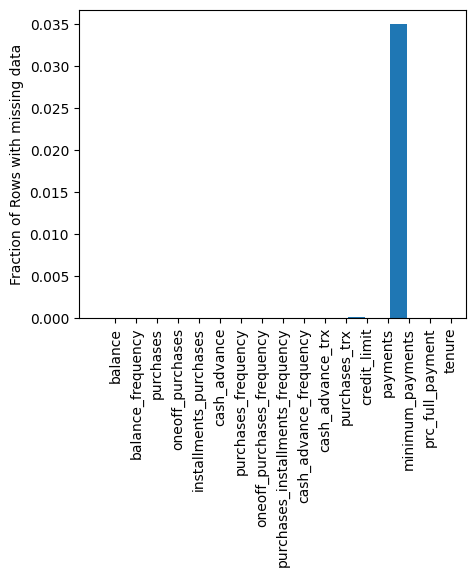

In [7]:
null_counts = cc.isnull().sum()/len(cc);
plt.figure(figsize=(5,4));
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical');
plt.ylabel('Fraction of Rows with missing data');
plt.bar(np.arange(len(null_counts)),null_counts);

C:\Users\Sainarayana\AppData\Local\Temp\ipykernel_4924\18758047.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cc.minimum_payments, hist=True, rug=True, color="r", ax=axes[0, 1]);
C:\Users\Sainarayana\AppData\Local\Temp\ipykernel_4924\18758047.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

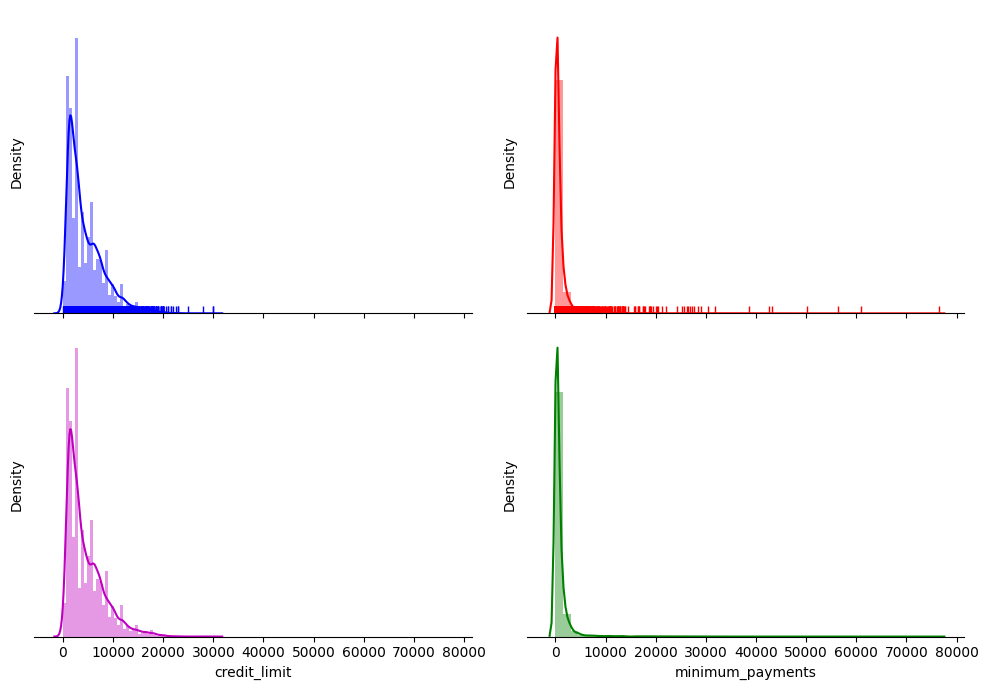

In [8]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True);
sns.despine(left=True);

# Plot a kernel density estimate and rug plot
sns.distplot(cc.minimum_payments, hist=True, rug=True, color="r", ax=axes[0, 1]);
sns.distplot(cc.credit_limit, hist=True, rug=True, color="b", ax=axes[0, 0]);

# Plot a filled kernel density estimate
sns.distplot(cc.minimum_payments,  color="g",ax=axes[1, 1]);
sns.distplot(cc.credit_limit, color="m", ax=axes[1, 0]);

plt.setp(axes, yticks=[]);
plt.tight_layout();

In [9]:
values = { 'minimum_payments' : cc['minimum_payments'].median(),
           'credit_limit' : cc['credit_limit'].median()
          }
cc.fillna(value = values, inplace = True)
missing = missing_columns_data(cc)
missing

,Missings,Missing pct


In [10]:
# Get column names first
names = cc.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(cc)
# Converting the numpy array into a pandas DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=names)
# Normalizing the Data 
normalized_df = normalize(scaled_df) #out
# Converting the numpy array into a pandas DataFrame 
df_out = pd.DataFrame(normalized_df,columns=names) # Normalized Dataframe

In [11]:
df_out.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.312090,-0.106349,-0.181160,-0.152182,-0.148833,-0.199018,-0.343854,-0.289353,-0.301569,-0.287941,-0.202977,-0.218012,-0.409466,-0.225535,-0.128931,-0.224073,0.153779
1,0.219912,0.037536,-0.131214,-0.099743,-0.127029,0.728121,-0.341413,-0.189648,-0.256249,0.160391,0.030760,-0.165374,0.192447,0.228765,0.027246,0.065453,0.100790
2,0.126690,0.146792,-0.030506,0.030852,-0.128798,-0.132258,0.359794,0.757488,-0.259819,-0.191351,-0.134888,-0.030889,0.234065,-0.108746,-0.026433,-0.148908,0.102194
3,0.020495,-0.424496,0.096865,0.227990,-0.189749,-0.153883,-0.423316,-0.166684,-0.382772,-0.108075,-0.137554,-0.230234,0.344830,-0.249904,-0.095300,-0.219375,0.150555
4,-0.151657,0.218998,-0.195318,-0.146804,-0.192153,-0.197314,-0.428679,-0.168795,-0.387621,-0.285475,-0.201239,-0.233151,-0.382724,-0.154021,-0.108749,-0.222155,0.152462


C:\Users\Sainarayana\AppData\Local\Temp\ipykernel_4924\1009179058.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_out[df_out.columns[4 * i + j]], ax=axs[i,j]);
C:\Users\Sainarayana\AppData\Local\Temp\ipykernel_4924\1009179058.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_out[df_o

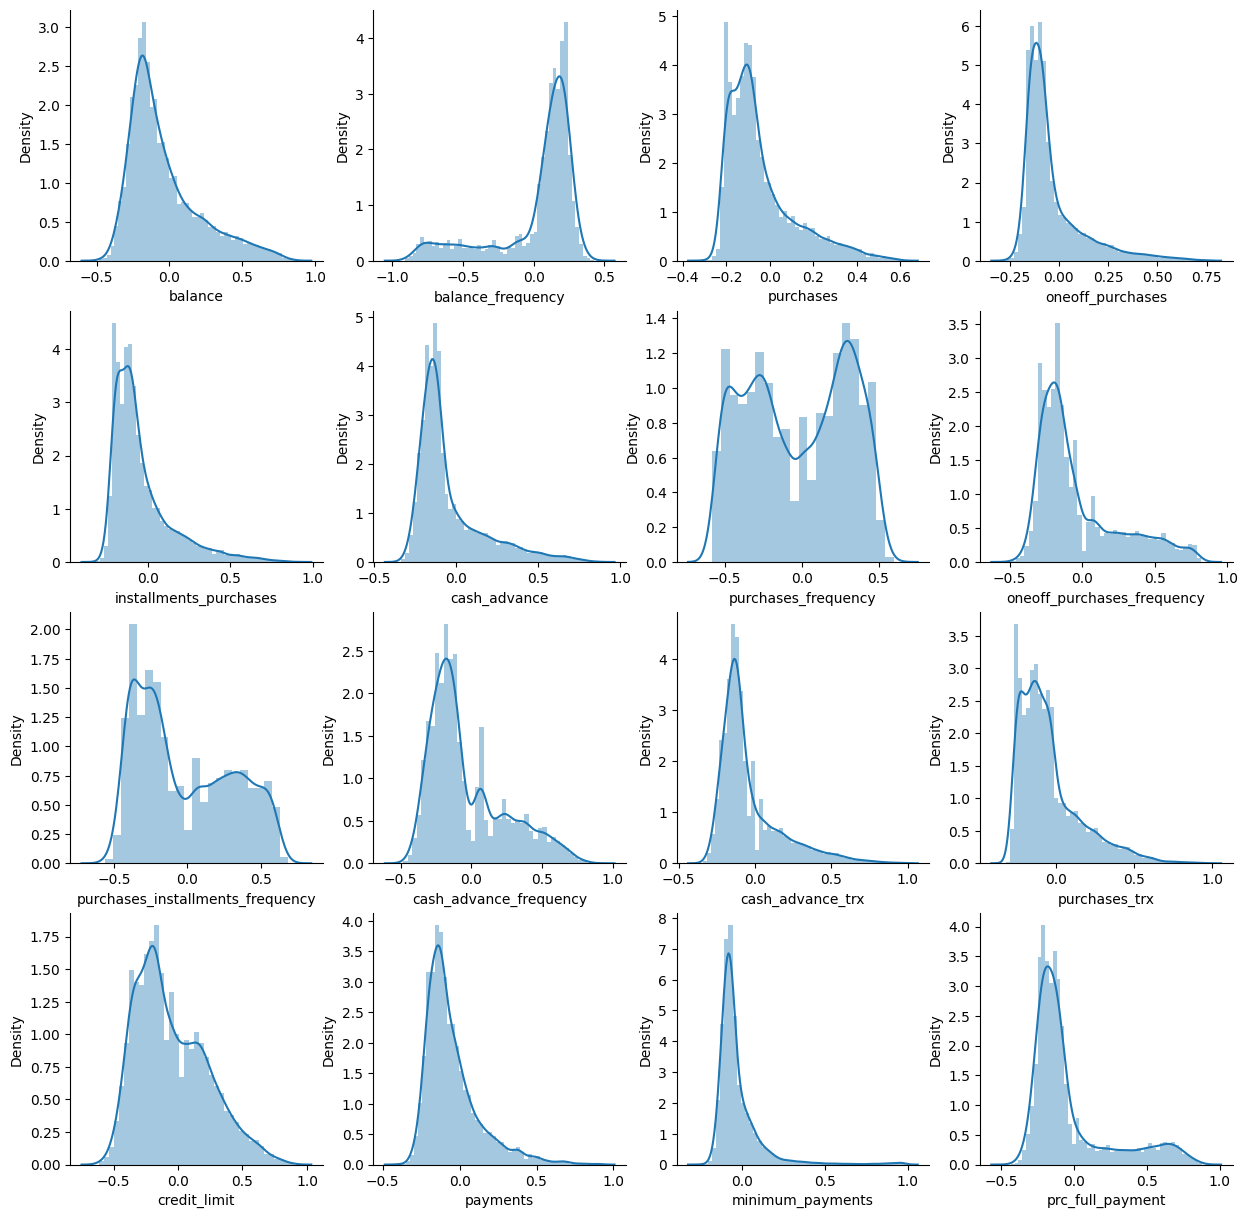

C:\Users\Sainarayana\AppData\Local\Temp\ipykernel_4924\1009179058.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_out.tenure, ax=axs);


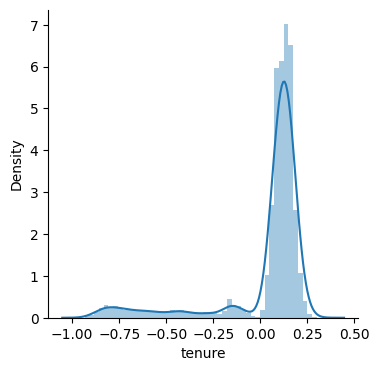

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15));
for i in range(4):
    for j in range(4):
        sns.distplot(df_out[df_out.columns[4 * i + j]], ax=axs[i,j]);
        sns.despine();
plt.show();
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4,4));
sns.distplot(df_out.tenure, ax=axs);
sns.despine();
plt.show();

c:\Users\Sainarayana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


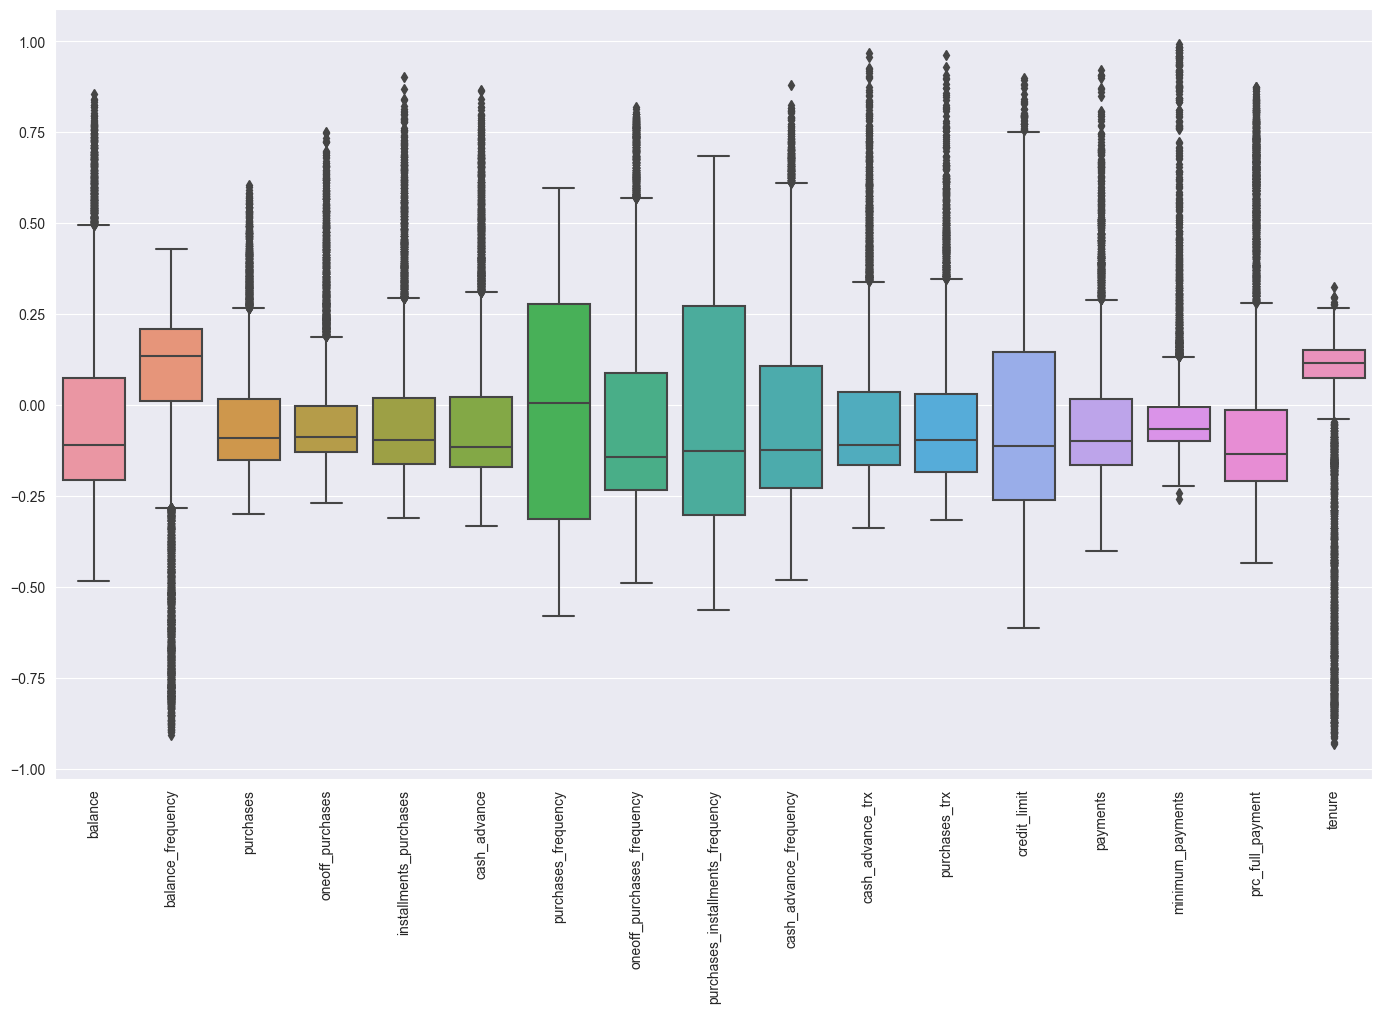

In [13]:
sns.set_style("darkgrid");
plt.figure(figsize=(17,10));
sns.boxplot(data=df_out);
#sns.violinplot(data=df_out);
#sns.stripplot(data=df_out);
plt.xticks(rotation=90);

<a id=heatmap></a>
### <font color=crimson> Visualization - Heatmap

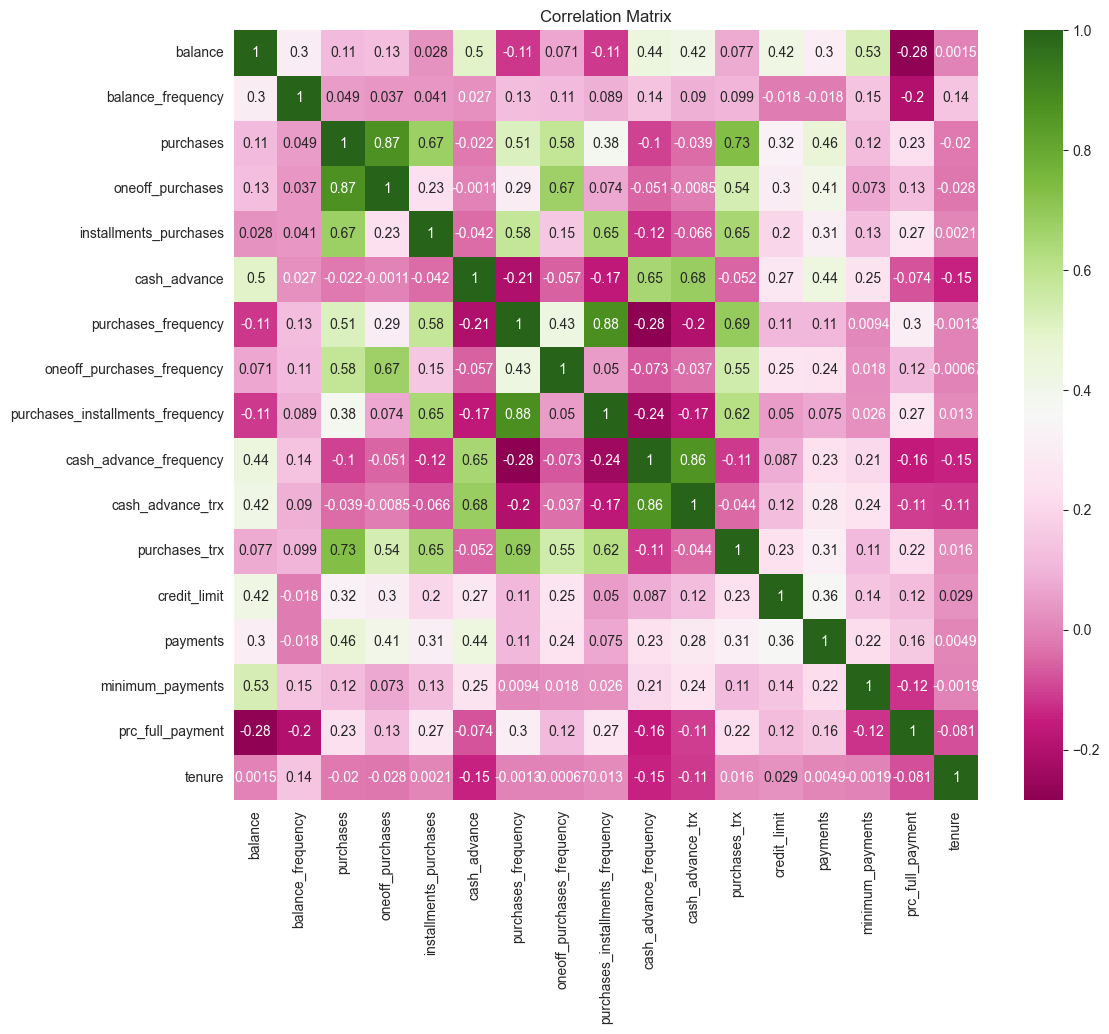

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(12,10));
cor = df_out.corr();
sns.heatmap(cor, annot=True, cmap=plt.cm.PiYG);
plt.title('Correlation Matrix')
plt.show();

In [15]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100);
    gm.fit(df_out);
    bic.append(gm.bic(df_out));
    aic.append(gm.aic(df_out));

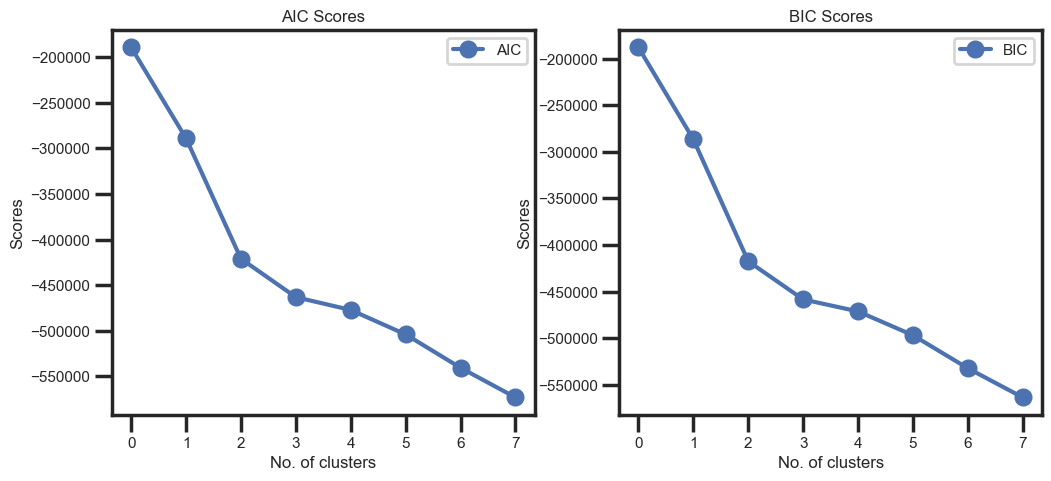

In [16]:
sns.set_style("whitegrid")
# Use white grid plot background from seaborn
sns.set(font_scale=0.5, style="ticks")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
#Draw aic ,bic on plot to understand

n_clusters=np.arange(0, 8);
fig, ax = plt.subplots(1, 2, figsize=(12,5));

plt.subplot(1, 2, 1);
plt.plot(n_clusters, aic,marker="o", label='AIC');
plt.title("AIC Scores");
plt.xticks(n_clusters);
plt.xlabel("No. of clusters");
plt.ylabel("Scores");
plt.legend();

plt.subplot(1, 2, 2);
plt.plot(n_clusters, bic, marker="o",label='BIC');
plt.title("BIC Scores");
plt.xticks(n_clusters);
plt.xlabel("No. of clusters");
plt.ylabel("Scores");
plt.legend();

plt.show();

In [17]:
#Gussian Mixture
gm = GaussianMixture(n_components = 3,
                     n_init = 10,
                     max_iter = 100);
gm.fit(df_out);
# Where are the cluster centers
print("Cluster centers:",gm.means_,"\nHas the alorgithm converged: ",gm.converged_,"\nNumber of iteration performed:",gm.n_iter_, "\nProbability Distribution:",gm.weights_ )
gm.means_
# Did algorithm converge?
gm.converged_
#  How many iterations did it perform?
gm.n_iter_
#  Clusters labels
#gm.predict(df_out)

gm.weights_

#  What is the frequency of data-points for the three clusters.
print("frequency of data-points for the three clusters:",np.unique(gm.predict(df_out), return_counts = True)[1]/len(df_out))

Cluster centers: [[-0.1417175  -0.02263418  0.00149385 -0.00515204  0.01288755 -0.16272661
   0.12555275  0.03315751  0.10327205 -0.23543388 -0.16596402  0.01841976
  -0.02927653 -0.07284528 -0.07492404  0.05688018  0.12573822]
 [ 0.04580257  0.02449828 -0.15450619 -0.11662216 -0.15109767  0.08552566
  -0.39483451 -0.210425   -0.30480012  0.16105612  0.08037399 -0.19461742
  -0.08496838 -0.05146163 -0.03249714 -0.14155694 -0.00453031]
 [ 0.03935236  0.07642915 -0.01316193 -0.01103983 -0.01062159  0.02642216
   0.07240107  0.02296952  0.04076128  0.08608575  0.04458483 -0.00492028
  -0.04679026 -0.01372528  0.03860255 -0.07292277 -0.06329625]] 
Has the alorgithm converged:  True 
Number of iteration performed: 41 
Probability Distribution: [0.42831851 0.2545269  0.31715459]
frequency of data-points for the three clusters: [0.42793296 0.25486034 0.3172067 ]


C:\Users\Sainarayana\AppData\Local\Temp\ipykernel_4924\727031753.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gm.means_[:, 0], gm.means_[:, 1],


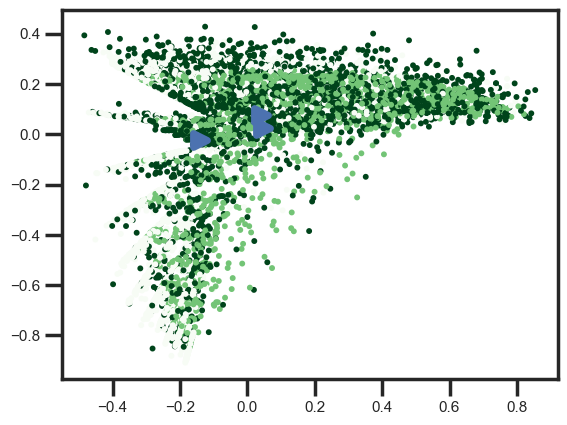

In [18]:
#Draw scatter plot to visualize the GMM output
fig = plt.figure();

plt.scatter(df_out.iloc[:, 0], df_out.iloc[:, 1],
            c=gm.predict(df_out),
            s=5,cmap =plt.cm.Greens
           );
plt.scatter(gm.means_[:, 0], gm.means_[:, 1],
            marker='>',
            s=100,               # marker size
            linewidths=5,      # linewidth of marker edges
            cmap =plt.cm.Greens
            );
plt.show()

In [19]:
gm = GaussianMixture(
                     n_components = 3,
                     n_init = 10,
                     max_iter = 100)
gm.fit(df_out)

GaussianMixture(n_components=3, n_init=10)

In [20]:
#df_out['cluster'] = gm.predict(df_out)
#len(df_out.cluster.unique())
arr=gm.predict(df_out);
df_cluster=pd.DataFrame(arr,columns=['cluster'])
df_out_cluster = pd.concat([df_out,df_cluster],axis=1)
#df_cluster.head()
df_out_cluster.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,-0.312090,-0.106349,-0.181160,-0.152182,-0.148833,-0.199018,-0.343854,-0.289353,-0.301569,-0.287941,-0.202977,-0.218012,-0.409466,-0.225535,-0.128931,-0.224073,0.153779,1
1,0.219912,0.037536,-0.131214,-0.099743,-0.127029,0.728121,-0.341413,-0.189648,-0.256249,0.160391,0.030760,-0.165374,0.192447,0.228765,0.027246,0.065453,0.100790,0
2,0.126690,0.146792,-0.030506,0.030852,-0.128798,-0.132258,0.359794,0.757488,-0.259819,-0.191351,-0.134888,-0.030889,0.234065,-0.108746,-0.026433,-0.148908,0.102194,1
3,0.020495,-0.424496,0.096865,0.227990,-0.189749,-0.153883,-0.423316,-0.166684,-0.382772,-0.108075,-0.137554,-0.230234,0.344830,-0.249904,-0.095300,-0.219375,0.150555,2
4,-0.151657,0.218998,-0.195318,-0.146804,-0.192153,-0.197314,-0.428679,-0.168795,-0.387621,-0.285475,-0.201239,-0.233151,-0.382724,-0.154021,-0.108749,-0.222155,0.152462,1


1    3830
2    2840
0    2280
Name: cluster, dtype: int64

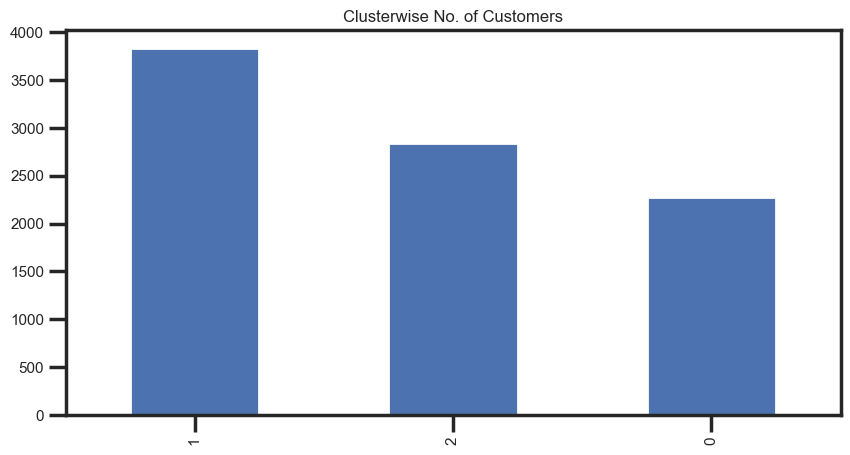

In [21]:
# Number of clients by cluster
df_out_cluster['cluster'].value_counts().plot.bar(figsize=(10,5), title='Clusterwise No. of Customers');

df_out_cluster['cluster'].value_counts()

<Figure size 2500x2500 with 0 Axes>

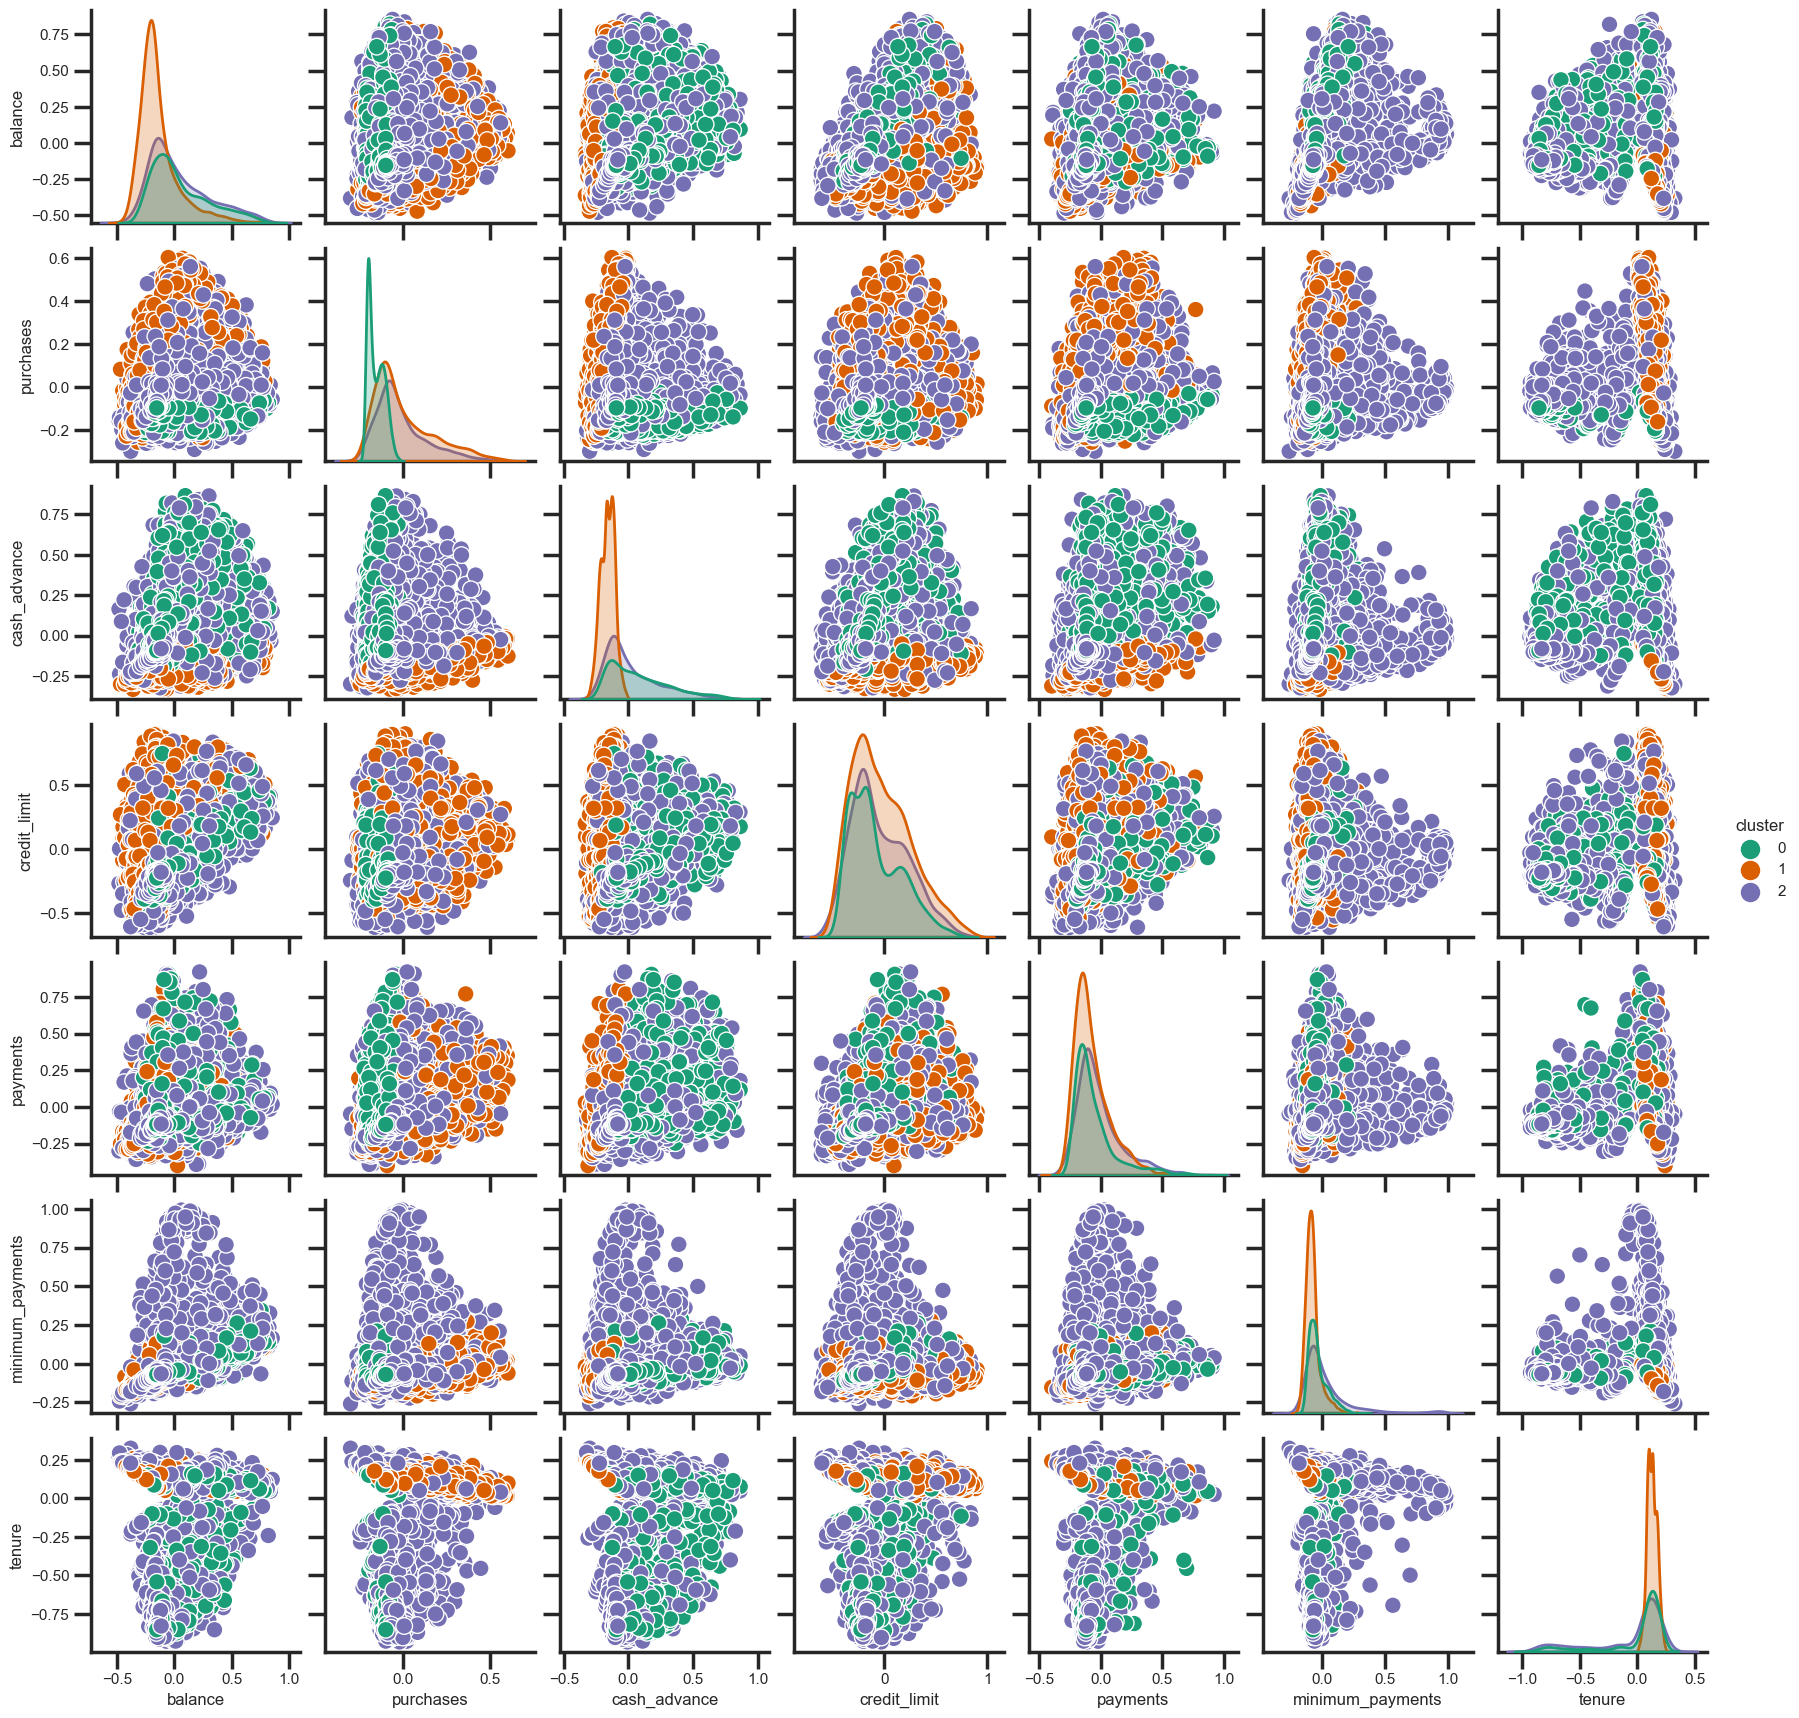

In [25]:
#pairwise relationships of key_features

key_features = ["balance", "purchases", "cash_advance","credit_limit", "payments", "minimum_payments", "tenure","cluster"]

#key_features.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df_out_cluster[key_features], hue="cluster",palette = 'Dark2')

In [23]:
densities = gm.score_samples(normalized_df)
density_threshold = np.percentile(densities,4)

print(densities," ",density_threshold)

[31.95877063 33.01791946 26.22682442 ... 12.85126324 31.72574736
 10.19503396]   4.811157476791182


c:\Users\Sainarayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
